In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

print("TenosrFlow Version :", tf.__version__)

TenosrFlow Version : 2.2.0


In [2]:
def plot_images(data, n_rows=10, n_cols=10, fig_size=(10,10)):
    
    fig, axes = plt.subplots(n_rows,n_cols,figsize = fig_size)
    axes = axes.ravel()

    data_len = len(data)

    for i in range(0,n_rows*n_cols):
        index = np.random.randint(0,data_len)
        axes[i].imshow(data[index], cmap='gray')
        #axes[i].set_title(y_train[i], fontsize = 8)
        axes[i].axis('off')

In [3]:
(x_train , y_train), (x_test , y_test) = keras.datasets.mnist.load_data()

In [4]:
print("X_train shape : {}, Y_train shape : {}".format(x_train.shape, y_train.shape))
print("X_test shape : {}, Y_test shape : {}".format(x_test.shape, y_test.shape))

X_train shape : (60000, 28, 28), Y_train shape : (60000,)
X_test shape : (10000, 28, 28), Y_test shape : (10000,)


In [5]:
x_train = x_train/255.0
x_test = x_test/255.0

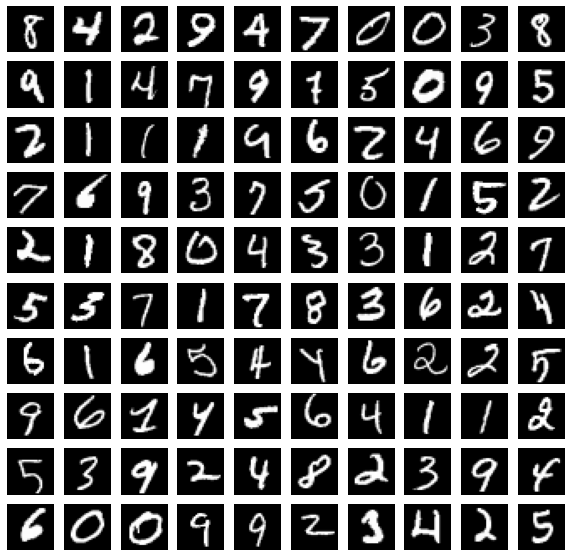

In [6]:
plot_params_train= [x_train, 10,10, (10,10)]
plot_images(*plot_params_train)

In [7]:
noise_factor = 1

noise_dataset_train = []
for img in x_train:
    row,col = img.shape
    mean, var = 0, 0.1
    sigma = var**0.5
    gauss = np.random.normal(mean,sigma,(row,col))
    gauss = gauss.reshape(row,col)
    noisy_image = img + noise_factor*gauss
    noise_dataset_train.append(noisy_image)

In [8]:
x_train_noisy = np.array(noise_dataset_train)
print("X train Noised Image Shape : {}".format(x_train_noisy.shape))

X train Noised Image Shape : (60000, 28, 28)


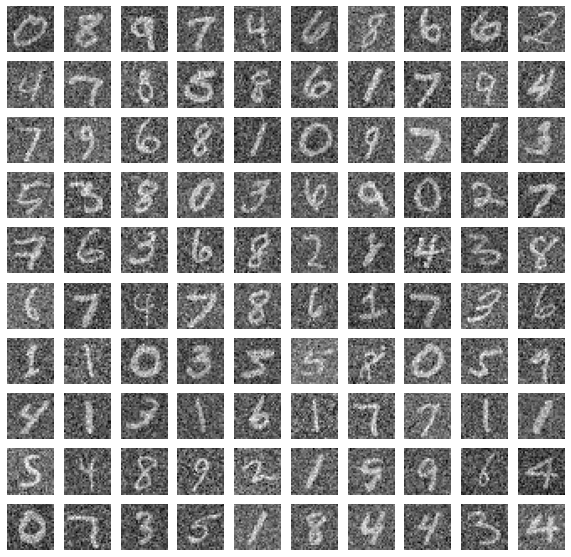

In [9]:
plot_params_noisy_train = [x_train_noisy, 10,10, (10,10)]
plot_images(*plot_params_noisy_train)

In [10]:
noise_factor_test = 1

noise_dataset_test = []
for img in x_test:
    row,col = img.shape
    mean, var = 0, 0.1
    sigma = var**0.5
    gauss = np.random.normal(mean,sigma,(row,col))
    gauss = gauss.reshape(row,col)
    noisy_image = img + noise_factor_test*gauss
    noise_dataset_test.append(noisy_image)

In [11]:
x_test_noisy = np.array(noise_dataset_test)
print("X test Noised Image Shape : {}".format(x_test_noisy.shape))

X test Noised Image Shape : (10000, 28, 28)


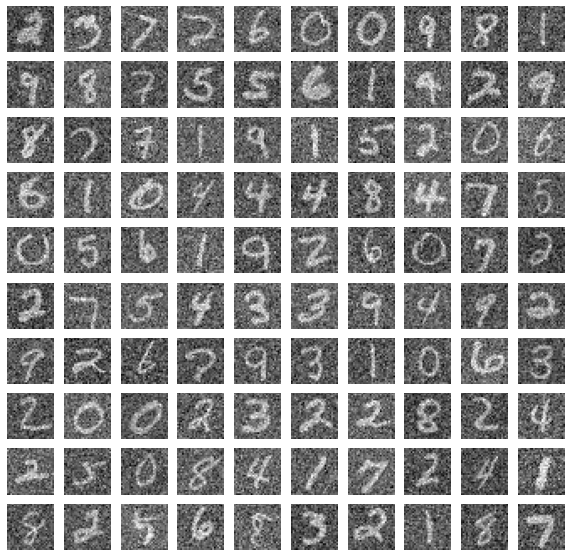

In [12]:
plot_params_noisy_test = [x_test_noisy, 10,10, (10,10)]
plot_images(*plot_params_noisy_test)

In [13]:
autoencoderModel = keras.models.Sequential()

autoencoderModel.add(keras.layers.Conv2D(filters = 64, kernel_size = 3, strides = 2, padding = 'same', input_shape=(28,28,1)))
autoencoderModel.add(keras.layers.Conv2D(filters = 32, kernel_size = 3, strides = 2, padding = 'same'))
autoencoderModel.add(keras.layers.Conv2D(filters = 8, kernel_size = 3, strides = 1, padding = 'same'))
autoencoderModel.add(keras.layers.Conv2DTranspose(filters = 32, kernel_size = 3, strides = 2, padding = 'same')) 
autoencoderModel.add(keras.layers.Conv2DTranspose(filters = 64, kernel_size = 3, strides = 1, padding = 'same')) 

autoencoderModel.add(keras.layers.Conv2DTranspose(filters = 1, kernel_size = 3, strides = 2, padding = 'same', activation = 'sigmoid'))
                     

autoencoderModel.compile(loss = keras.losses.BinaryCrossentropy(), optimizer=keras.optimizers.Adam(lr=0.008), metrics=['accuracy'])
autoencoderModel.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 14, 14, 64)        640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 7, 7, 32)          18464     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 8)           2312      
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 14, 14, 32)        2336      
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_transpose_2 (Conv2DTr (None, 28, 28, 1)         577       
Total params: 42,825
Trainable params: 42,825
Non-trainable params: 0
____________________________________________________

In [14]:
model_history = autoencoderModel.fit(x = np.expand_dims(x_train_noisy, axis=3), 
                     y = np.expand_dims(x_train, axis=3), 
                     epochs = 15, 
                     batch_size=256, 
                     validation_data=(np.expand_dims(x_test_noisy, axis = 3), np.expand_dims(x_test, axis = 3)),
                     verbose = 1, shuffle = True)

Epoch 1/15
235/235 [==============================] - 14s 60ms/step - loss: 0.1147 - accuracy: 0.8115 - val_loss: 0.0897 - val_accuracy: 0.8139
Epoch 2/15
235/235 [==============================] - 5s 21ms/step - loss: 0.0899 - accuracy: 0.8149 - val_loss: 0.0888 - val_accuracy: 0.8139
Epoch 3/15
235/235 [==============================] - 5s 21ms/step - loss: 0.0894 - accuracy: 0.8149 - val_loss: 0.0887 - val_accuracy: 0.8139
Epoch 4/15
235/235 [==============================] - 5s 21ms/step - loss: 0.0893 - accuracy: 0.8149 - val_loss: 0.0884 - val_accuracy: 0.8139
Epoch 5/15
235/235 [==============================] - 5s 21ms/step - loss: 0.0893 - accuracy: 0.8149 - val_loss: 0.0882 - val_accuracy: 0.8139
Epoch 6/15
235/235 [==============================] - 5s 21ms/step - loss: 0.0892 - accuracy: 0.8149 - val_loss: 0.0885 - val_accuracy: 0.8139
Epoch 7/15
235/235 [==============================] - 5s 21ms/step - loss: 0.0892 - accuracy: 0.8149 - val_loss: 0.0890 - val_accuracy: 0.813

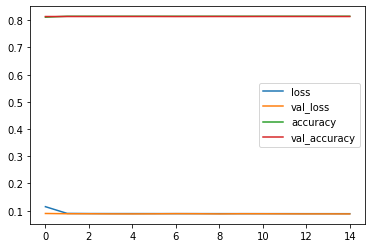

In [15]:
keys = ['loss', 'val_loss', 'accuracy', 'val_accuracy']

for k in keys:
    plt.plot(model_history.history[k])
    
plt.legend(keys)
plt.show()

In [16]:
autoencoderModel.evaluate(np.expand_dims(x_test_noisy, axis = 3), np.expand_dims(x_test, axis = 3))

313/313 [==============================] - 1s 3ms/step - loss: 0.0881 - accuracy: 0.8139


[0.08808208256959915, 0.8139020204544067]

In [17]:
predicted_result = autoencoderModel.predict(np.expand_dims(x_test_noisy, axis = 3))

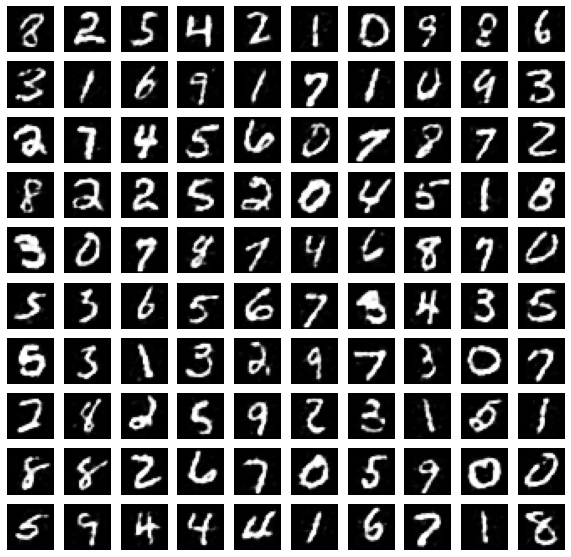

In [18]:
plot_params_noisy_test = [predicted_result[:,:,:,0], 10,10, (10,10)]
plot_images(*plot_params_noisy_test)